In [1]:
import pandas as pd
import shap
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from PIL import Image, ImageOps
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, ndcg_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from PIL import Image, ImageOps
import lime
import lime.lime_tabular
from tqdm import tqdm 
import random
import itertools

## Ridge Regression:

In [20]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)
df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

print(list(df.columns))

['Season', 'Team', 'team_id', 'conference', 'max_player', 'champion_share', 'champion', 'Rk', 'rk_season', 'Arena', 'rk_conference', 'top_3_conference', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%', 'defensive_DRB%', 'defensive_FT/FGA', 'Attend.', 'Attend./G', 'make_playoffs', 'overall_record', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG', 'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%', 'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec', 'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_o

In [21]:
data_columns = ['rk_conference', 'top_3_conference', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
                '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG',
                'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%',
                'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec',
                'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_or_less_rec',
                '10pt_or_more_rec', 'pre_all_star_rec', 'post_all_star_rec', 'e_conf_rec', 'w_conf_rec', 'sum_mvp_shares', 'sum_dpoy_shares', 
                'sum_roy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_cpoy_shares', 'sum_all_nba', 'sum_all_defense', 'sum_all_rookie',
                'sum_mvps_won', 'sum_dpoys_won', 'sum_roys_won', 'sum_mips_won', 'sum_cpoys_won', 'sum_all_nba_1st', 'sum_all_def_1st', 'sum_playoff_games',
                'sum_mvp_shares_L3S', 'sum_mvp_shares_L5S', 'sum_champion_shares', 'sum_champions', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs',
                'sum_player_L8S_cs', 'sum_all_nba_1st_L5S', 'team_rating_custom', 'max_player_rating_custom','sum_coach_playoff_games', 'sum_coy_shares',
                'conference_5pt_or_less_rec', 'conference_OR', 'conference_SRS', 'conference_age', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 
                'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%',
                'defensive_DRB%', 'defensive_FT/FGA','overall_record', 'rk_season','sum_franchise_L1S_cs', 'sum_franchise_L3S_cs', 'sum_franchise_L5S_cs', 'sum_franchise_L8S_cs',
                 'rank_offensive_eFG%', 'rank_2P%', 'rank_sum_all_nba_1st_L5S', 'rank_SRS', 'top_5_offensive_eFG%', 'top_3_2P%', 'top_5_sum_all_nba_1st_L5S', 'top_6_SRS'
               ]

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

In [22]:
correlation_matrix = data.corr()

correlation_threshold = .75

columns_to_remove = set()
#print("Columns to be Removed:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in columns_to_remove:
                columns_to_remove.add(feature_j)
                #print(f"{feature_j} (correlated with {feature_i}): {correlation:.2f}")

data_filtered = data.drop(columns=columns_to_remove)

In [23]:
print("Columns in data_filtered:")
print(", ".join(f"'{column}'" for column in data_filtered.columns))

print("\nColumns that were removed:")
print(", ".join(f"'{removed_column}'" for removed_column in columns_to_remove))

Columns in data_filtered:
'rk_conference', 'G', 'MP', 'FG', 'FGA', '3P', '3P%', '2P%', 'FT', 'FT%', 'ORB', 'TRB', 'AST', 'PF', 'pso', 'over500_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_or_less_rec', 'pre_all_star_rec', 'post_all_star_rec', 'e_conf_rec', 'sum_mvp_shares', 'sum_dpoy_shares', 'sum_roy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_cpoy_shares', 'sum_all_defense', 'sum_all_rookie', 'sum_playoff_games', 'sum_mvp_shares_L3S', 'sum_champions', 'sum_player_L1S_cs', 'sum_all_nba_1st_L5S', 'max_player_rating_custom', 'sum_coach_playoff_games', 'conference_5pt_or_less_rec', 'conference_OR', 'conference_age', 'PW', 'PL', 'SOS', 'DRtg', 'sum_franchise_L3S_cs', 'rank_offensive_eFG%', 'rank_sum_all_nba_1st_L5S', 'top_5_offensive_eFG%', 'top_3_2P%', 'top_5_sum_all_nba_1st_L5S', 'top_6_SRS'

Columns that were removed:
'opp_ORB', 'sum_mvps_won', 'sum_player_L5S_cs', 'opp_3P', 'Pace', 'FG%', 'conference_SRS', '3PAr', 'of

In [24]:
features = ['top_3_conference', 'FG', '3P', '3P%', '2P', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF',  'opp_3P%','opp_FT%', 'opp_ORB',
            'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_BLK', 'Age', 'pso', 'sum_mvp_shares_L3S', 'top_6_SRS', 'top_5_offensive_eFG%' , 'sum_franchise_L3S_cs', 'sum_playoff_games', 'sum_games_5pts_or_less', 'sum_roy_shares', '3pt_or_less_rec',
            'offensive_eFG%', 'conference_OR', 'defensive_eFG%', 'sum_dpoys_won'
           ]

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 35


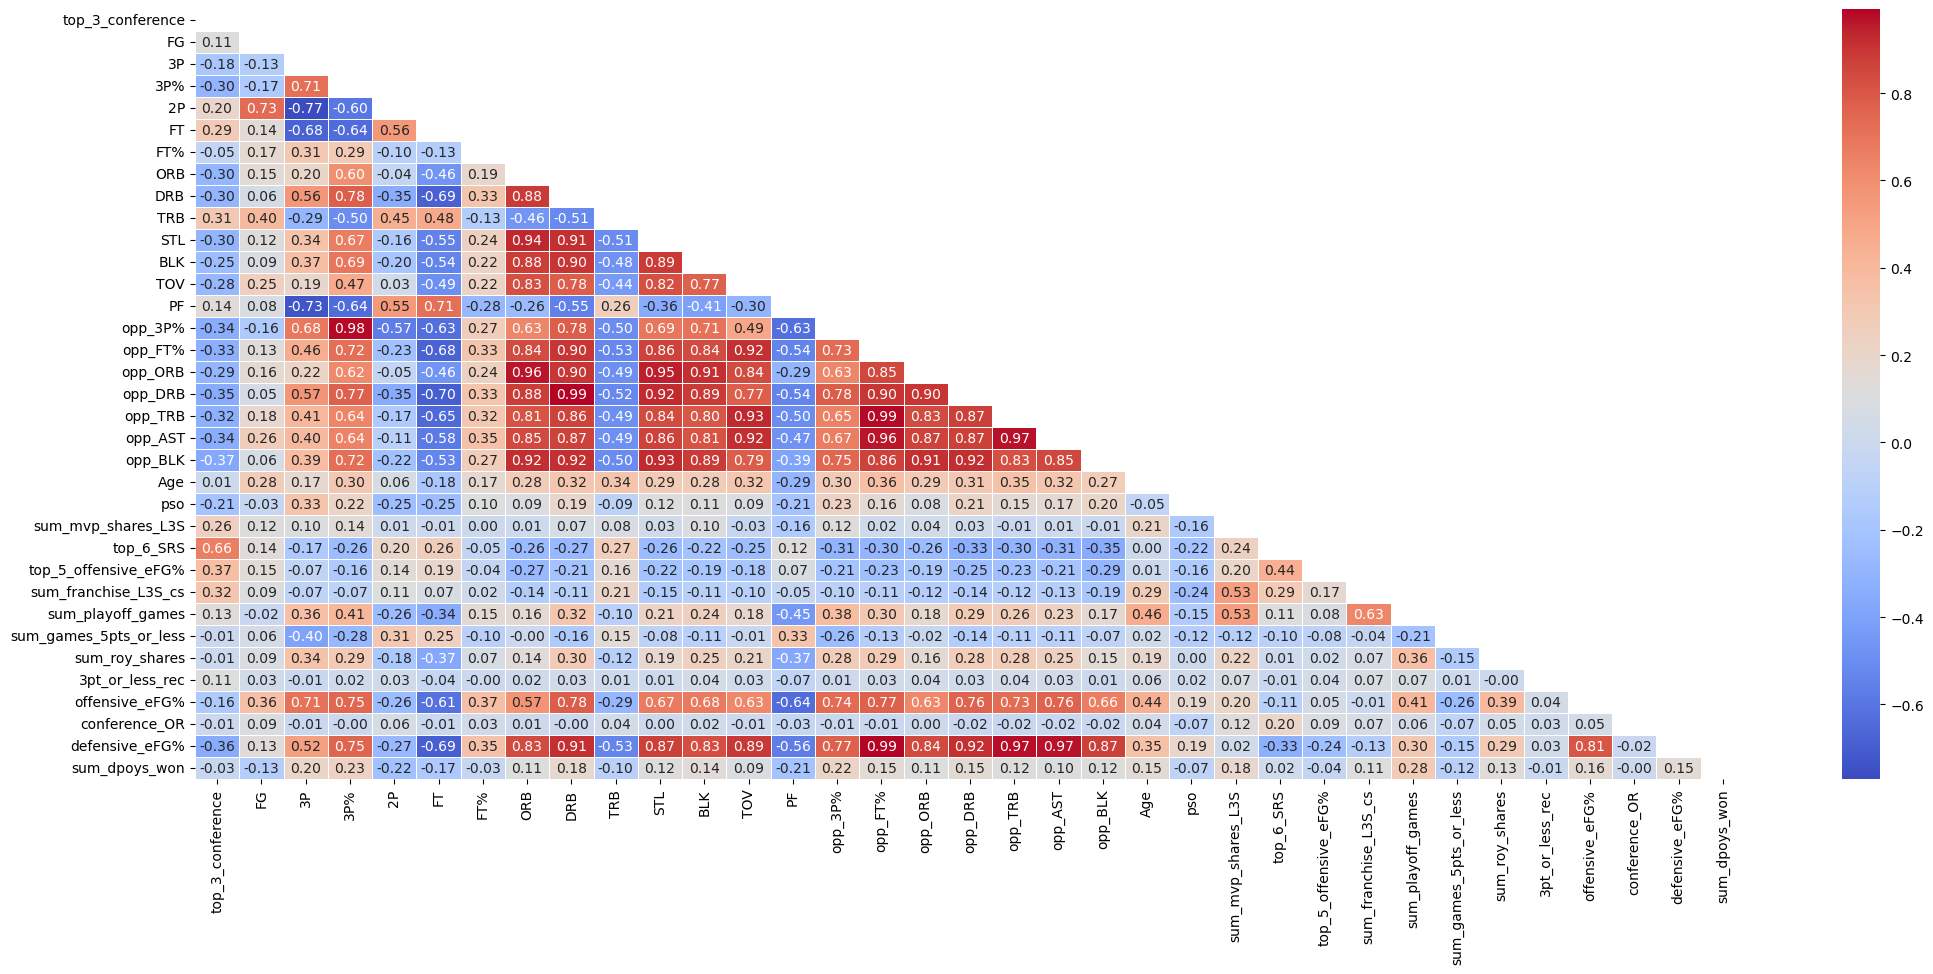

In [25]:
selected_features_data = data[features]
correlation_matrix = selected_features_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.show()

Results:

    Season                    Team  champion_share  predicted_cs
2     2025          Boston Celtics             0.0      0.590686
0     2025     Cleveland Cavaliers             0.0      0.565333
5     2025         New York Knicks             0.0      0.537912
1     2025   Oklahoma City Thunder             0.0      0.514697
4     2025       Memphis Grizzlies             0.0      0.487155
3     2025         Houston Rockets             0.0      0.430806
6     2025          Denver Nuggets             0.0      0.303555
10    2025         Milwaukee Bucks             0.0      0.238654
9     2025          Indiana Pacers             0.0      0.224170
11    2025  Minnesota Timberwolves             0.0      0.168149
13    2025        Dallas Mavericks             0.0      0.145618
18    2025           Orlando Magic             0.0      0.114455
8     2025    Los Angeles Clippers             0.0      0.108487
21    2025           Chicago Bulls             0.0      0.080978
22    2025     

C:\Users\allen\AppData\Local\Temp\ipykernel_10272\2424029739.py:34: RuntimeWarning: invalid value encountered in scalar divide
  return dcg / idcg


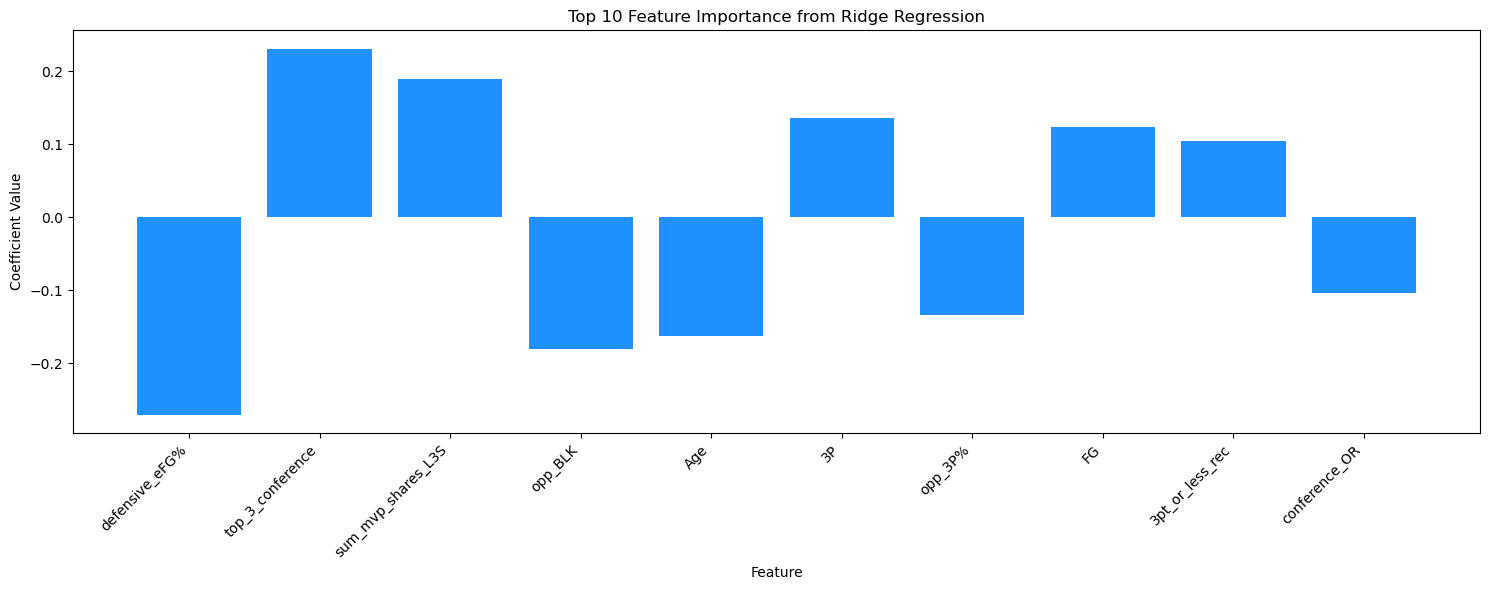

In [26]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)
df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

df.drop(df[df['Season'] < 1986].index, inplace = True)

train = df[df["Season"] < 2025].copy()
test = df[df["Season"] == 2025].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

rig = Ridge(alpha=.5)
rig.fit(train[features], train["champion_share"])

predictions = rig.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

print("Results:")
print("=============================================================================\n")
print(frame.head(16))
print("-----------------------------------------------------------------------------\n")

def ndcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        dcg = np.sum(r / np.log2(np.arange(2, r.size + 2)))
        idcg = np.sum(np.sort(r)[::-1] / np.log2(np.arange(2, r.size + 2)))
        return dcg / idcg
    return 0.

def calculate_ndcg(df, k=None):
    true_relevance = df['champion_share'].values
    return ndcg_at_k(true_relevance, k)

ndcg_score_true = calculate_ndcg(frame, k=16)

print("NDCG Scores: ")
print("=============================================================================\n")
print("True NDCG @: ", ndcg_score_true)
print("-----------------------------------------------------------------------------\n")

coefficients = rig.coef_
feature_coefficients = dict(zip(features, coefficients))
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

top_features = sorted_feature_coefficients[:10]
features_names = [x[0] for x in top_features]
coeff_values = [x[1] for x in top_features]

plt.figure(figsize=(15, 6))
plt.bar(features_names, coeff_values, color='dodgerblue')
plt.title('Top 10 Feature Importance from Ridge Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

predictions = rig.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
rig_reg_frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
rig_reg_frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

In [27]:
actual = frame.sort_values("champion_share", ascending=False)
predicted = frame.sort_values("predicted_cs", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame):
    actual = frame.sort_values("champion_share", ascending=False).head(1) #HEAD

    predicted = frame.sort_values("predicted_cs", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame)
print("=============================================================================\n")
print("AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x            Team  champion_share_x  predicted_cs_x  Rank  Season_y  champion_share_y  predicted_cs_y  Predicted Rank
0      2025  Boston Celtics               0.0        0.590686     1      2025               0.0        0.590686               1

AP Champion:  1.0


In [28]:

rig_reg_combined_predictions = pd.DataFrame(columns=["Season", "Team/Season", "Team", "predicted_cs", "champion_share"])

all_predictions = []
aps = []
ndcgs = []

backtest_seasons = [2020,2021,2022,2023,2024,2025]
#backtest_seasons = list(range(2024, 1959, -1))

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rig.fit(train[features], train['champion_share'])
    predictions = rig.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
    frame = pd.concat([test[["Team", "champion_share", "Season"]], predictions_df], axis=1)

    frame['Team/Season'] = frame['Team'] + ' ' + frame['Season'].astype(str)

    rig_reg_combined_predictions = pd.concat([rig_reg_combined_predictions, frame], ignore_index=True)

    if not frame.empty:
        all_predictions.append(frame)
        ap = find_ap(frame)
        aps.append(ap)

        ndcg = ndcg_score(frame["champion_share"].values.reshape(1, -1), predictions.reshape(1, -1))
        ndcgs.append(ndcg)

        reciprocal_ap = 1 / ap
        print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)} | NDCG: {round(ndcg, 2)}")
    else:
        print(f"No data for Season {season}")

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted_cs", ascending=False).head(5)

    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted_cs", "champion_share"]])

average_ndcg = np.mean(ndcgs)
average_ap = np.mean(aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_ndcg = 1.0 / average_ndcg

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average Champion Rank: {round(reciprocal_average_ap, 2)} | Reciprocal NDCG: {round(reciprocal_ndcg, 2)}")
print(f"Min Champion Rank: {round(reciprocal_min_ap, 2)}")
print(f"Max Champion Rank: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

rig_reg_combined_predictions.to_csv("rig_reg_nba_preds.csv", index=False)

Champion AP for Season 2020: 1.0 | Reciprocal: 1.0 | NDCG: 0.92
Champion AP for Season 2021: 1.0 | Reciprocal: 1.0 | NDCG: 0.94
Champion AP for Season 2022: 1.0 | Reciprocal: 1.0 | NDCG: 0.94
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0 | NDCG: 0.87
Champion AP for Season 2024: 1.0 | Reciprocal: 1.0 | NDCG: 0.9
Champion AP for Season 2025: 0.5 | Reciprocal: 2.0 | NDCG: 0.0

Top 5 Predicted Teams for Season 2020:
                     Team  predicted_cs  champion_share
152    Los Angeles Lakers      0.680264          1.0000
150       Milwaukee Bucks      0.649577          0.3125
153  Los Angeles Clippers      0.578535          0.4375
154        Boston Celtics      0.500085          0.6250
151       Toronto Raptors      0.489941          0.4375

Top 5 Predicted Teams for Season 2021:
                     Team  predicted_cs  champion_share
126       Milwaukee Bucks      0.623035          1.0000
123         Brooklyn Nets      0.609213          0.4375
120             Utah Jazz      0.5

C:\Users\allen\AppData\Local\Temp\ipykernel_10272\1943187247.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rig_reg_combined_predictions = pd.concat([rig_reg_combined_predictions, frame], ignore_index=True)


### Analyze Model Decision Making

Top 10 Features:
['top_3_conference', 'defensive_eFG%', '3P', 'Age', 'conference_OR', 'top_6_SRS', 'sum_mvp_shares_L3S', 'opp_AST', 'opp_BLK', 'FG']


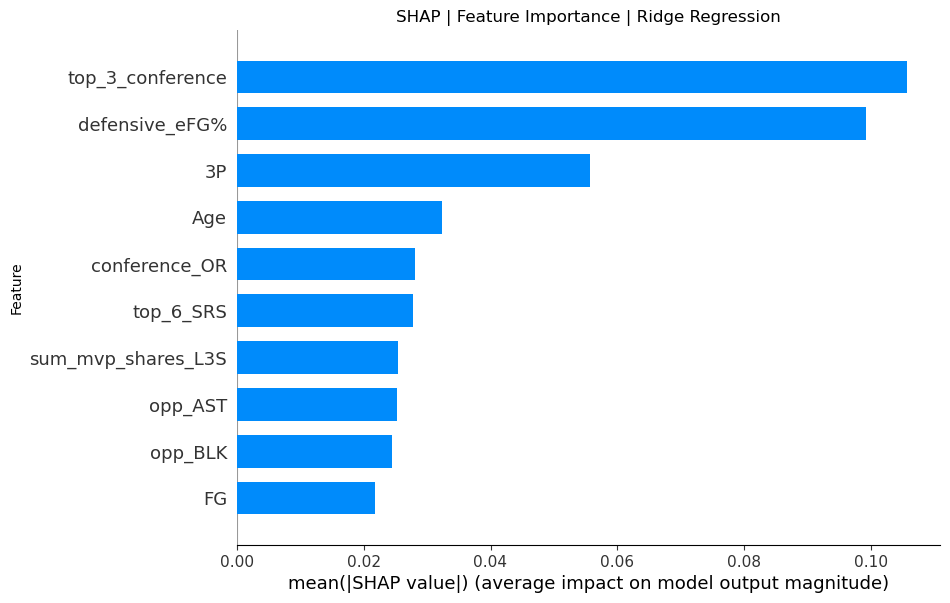

In [29]:
explainer = shap.LinearExplainer(rig, train[features])
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)
plt.title('SHAP | Feature Importance | Ridge Regression')

plt.ylabel("Feature")
plt.show()

Top 10 Features:
['top_3_conference', 'defensive_eFG%', '3P', 'Age', 'conference_OR', 'top_6_SRS', 'sum_mvp_shares_L3S', 'opp_AST', 'opp_BLK', 'FG']


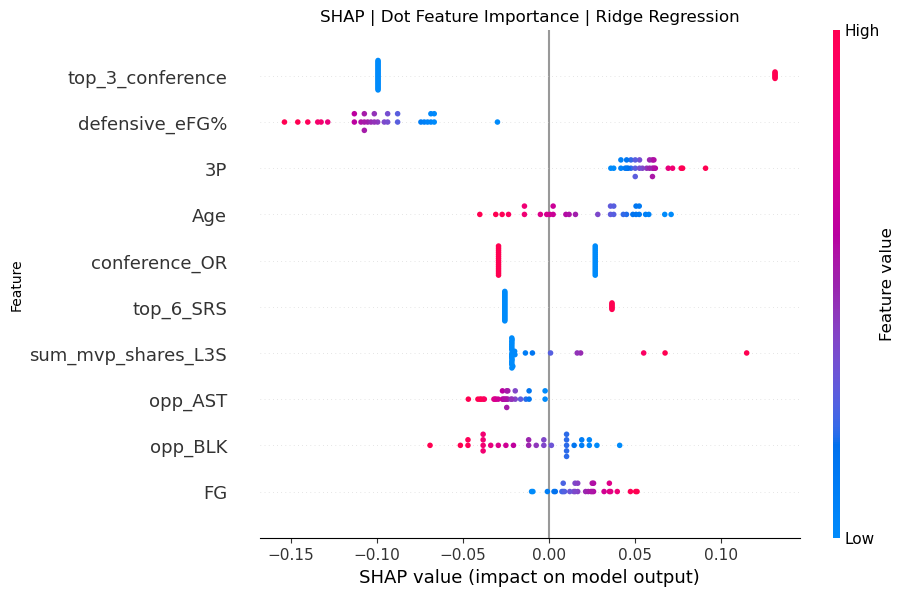

In [30]:

explainer = shap.LinearExplainer(rig, train[features])
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Dot Feature Importance | Ridge Regression')

plt.ylabel("Feature")
plt.show()

### XG-Boost Regression:

In [31]:
print(list(df))

['Season', 'Team', 'team_id', 'conference', 'max_player', 'champion_share', 'champion', 'Rk', 'rk_season', 'Arena', 'rk_conference', 'top_3_conference', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%', 'defensive_DRB%', 'defensive_FT/FGA', 'Attend.', 'Attend./G', 'make_playoffs', 'overall_record', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG', 'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%', 'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec', 'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_o

In [32]:
features = ['top_3_conference', 'FG', '3P', '3P%', '2P', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF',  'opp_3P%','opp_FT%', 'opp_ORB',
            'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_BLK', 'Age', 'pso', 'sum_mvp_shares_L3S', 'top_6_SRS', 'top_5_offensive_eFG%' , 'sum_franchise_L3S_cs', 'sum_playoff_games', 'sum_games_5pts_or_less', 'sum_roy_shares', '3pt_or_less_rec',
            'offensive_eFG%', 'conference_OR', 'defensive_eFG%', 'sum_dpoys_won', 'sum_mvp_shares', 'sum_dpoy_shares', '3PAr', 'TS%', 'sum_mips_won','DRtg', 'sum_player_L5S_cs','sum_all_def_1st', 'sum_mvps_won'
           ]

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 44


Results:

    Season                    Team  champion_share  predicted_cs
2     2025          Boston Celtics             0.0      0.641312
0     2025     Cleveland Cavaliers             0.0      0.586672
5     2025         New York Knicks             0.0      0.520273
4     2025       Memphis Grizzlies             0.0      0.428012
1     2025   Oklahoma City Thunder             0.0      0.422700
3     2025         Houston Rockets             0.0      0.364617
28    2025               Utah Jazz             0.0      0.346086
22    2025      Philadelphia 76ers             0.0      0.330041
20    2025           Atlanta Hawks             0.0      0.325437
27    2025    New Orleans Pelicans             0.0      0.295697
12    2025            Phoenix Suns             0.0      0.294709
10    2025         Milwaukee Bucks             0.0      0.284124
25    2025           Brooklyn Nets             0.0      0.255500
29    2025      Washington Wizards             0.0      0.254116
15    2025     

C:\Users\allen\AppData\Local\Temp\ipykernel_10272\2053211903.py:42: RuntimeWarning: invalid value encountered in scalar divide
  return dcg / idcg


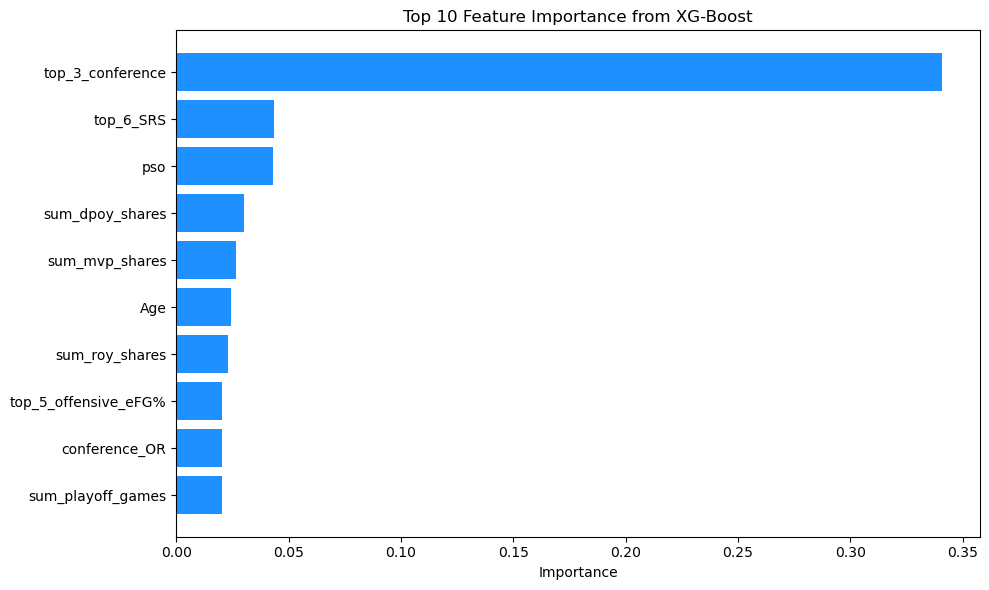

In [33]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)

df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

df.drop(df[df['Season'] < 1988].index, inplace=True)

train = df[df["Season"] < 2025].copy()
test = df[df["Season"] == 2025].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=44, max_depth=3, 
    learning_rate=0.1, 
    random_state=5
    )

xgb_model.fit(train[features], train["champion_share"])

predictions = xgb_model.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)

frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

print("Results:")
print("=============================================================================\n")
print(frame.head(16))
print("-----------------------------------------------------------------------------\n")

def ndcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        dcg = np.sum(r / np.log2(np.arange(2, r.size + 2)))
        idcg = np.sum(np.sort(r)[::-1] / np.log2(np.arange(2, r.size + 2)))
        return dcg / idcg
    return 0.

def calculate_ndcg(df, k=16):
    true_relevance = df['champion_share'].values
    return ndcg_at_k(true_relevance, k)

ndcg_score_true = calculate_ndcg(frame, k=16)
print("NDCG Scores: ")
print("=============================================================================\n")
print("True NDCG @: ", ndcg_score_true)
print("-----------------------------------------------------------------------------\n")

xgb_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(xgb_importance)[::-1]
top_features = [features[i] for i in sorted_idx[:10]]
importance_values = xgb_importance[sorted_idx[:10]]

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create the horizontal bar chart
ax.barh(top_features, importance_values, color='dodgerblue')
ax.set_title('Top 10 Feature Importance from XG-Boost')
ax.set_xlabel('Importance') 
ax.invert_yaxis()
plt.tight_layout()
plt.show()


In [34]:

xgb_reg_combined_predictions = pd.DataFrame(columns=["Season", "Team/Season", "Team", "predicted_cs", "champion_share"])

all_predictions = []
aps = []
ndcgs = []

backtest_seasons = [2020,2021,2022,2023,2024,2025]
#backtest_seasons = list(range(2024, 1995, -1))

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    xgb_model.fit(train[features], train['champion_share'])
    predictions = xgb_model.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
    frame = pd.concat([test[["Team", "champion_share", "Season"]], predictions_df], axis=1)

    frame['Team/Season'] = frame['Team'] + ' ' + frame['Season'].astype(str)

    xgb_reg_combined_predictions = pd.concat([xgb_reg_combined_predictions, frame], ignore_index=True)

    if not frame.empty:
        all_predictions.append(frame)
        ap = find_ap(frame)
        aps.append(ap)

        ndcg = ndcg_score(frame["champion_share"].values.reshape(1, -1), predictions.reshape(1, -1))
        ndcgs.append(ndcg)

        reciprocal_ap = 1 / ap
        print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)} | NDCG: {round(ndcg, 2)}")
    else:
        print(f"No data for Season {season}")

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted_cs", ascending=False).head(5)

    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted_cs", "champion_share"]])

average_ndcg = np.mean(ndcgs)
average_ap = np.mean(aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_ndcg = 1.0 / average_ndcg

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average Champion Rank: {round(reciprocal_average_ap, 2)} | Reciprocal NDCG: {round(reciprocal_ndcg, 2)}")
print(f"Min Champion Rank: {round(reciprocal_min_ap, 2)}")
print(f"Max Champion Rank: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

xgb_reg_combined_predictions.to_csv("xgb_reg_nba_preds.csv", index=False)

C:\Users\allen\AppData\Local\Temp\ipykernel_10272\4279370163.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  xgb_reg_combined_predictions = pd.concat([xgb_reg_combined_predictions, frame], ignore_index=True)


Champion AP for Season 2020: 1.0 | Reciprocal: 1.0 | NDCG: 0.92
Champion AP for Season 2021: 1.0 | Reciprocal: 1.0 | NDCG: 0.93
Champion AP for Season 2022: 1.0 | Reciprocal: 1.0 | NDCG: 0.93
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0 | NDCG: 0.86
Champion AP for Season 2024: 1.0 | Reciprocal: 1.0 | NDCG: 0.9
Champion AP for Season 2025: 0.5 | Reciprocal: 2.0 | NDCG: 0.0

Top 5 Predicted Teams for Season 2020:
                     Team  predicted_cs  champion_share
152    Los Angeles Lakers      0.709710          1.0000
153  Los Angeles Clippers      0.703193          0.4375
150       Milwaukee Bucks      0.620205          0.3125
151       Toronto Raptors      0.531643          0.4375
155        Denver Nuggets      0.515133          0.5625

Top 5 Predicted Teams for Season 2021:
                     Team  predicted_cs  champion_share
126       Milwaukee Bucks      0.638676          1.0000
123         Brooklyn Nets      0.615976          0.4375
122    Philadelphia 76ers      0.6

### Analyzing Model Decision Making

Top 10 Features:
['top_3_conference', 'defensive_eFG%', 'TS%', 'pso', 'top_6_SRS', 'top_5_offensive_eFG%', '3P', '3pt_or_less_rec', 'Age', 'opp_BLK']


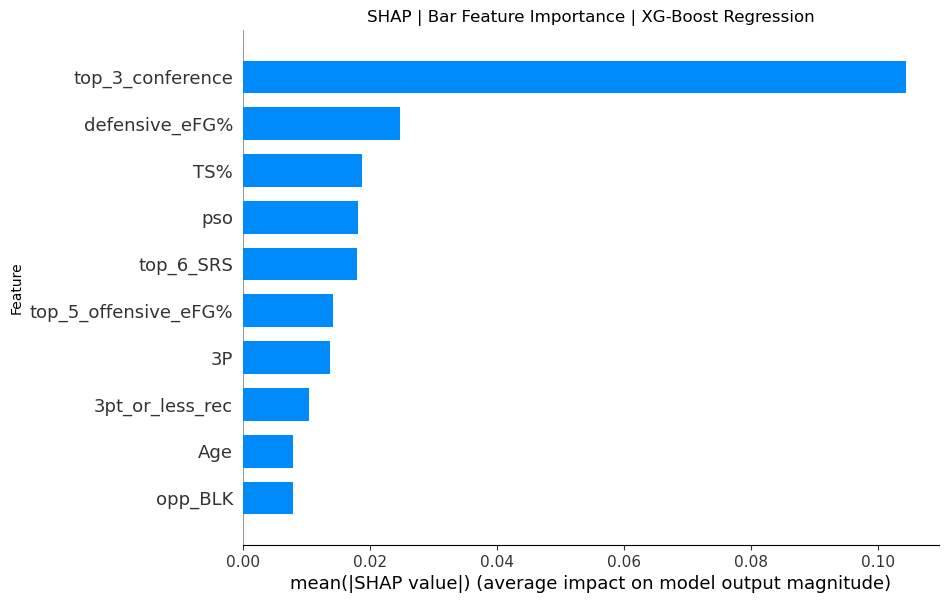

In [35]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Bar Feature Importance | XG-Boost Regression')

plt.ylabel("Feature")
plt.show()

Top 10 Features:
['top_3_conference', 'defensive_eFG%', 'TS%', 'pso', 'top_6_SRS', 'top_5_offensive_eFG%', '3P', '3pt_or_less_rec', 'Age', 'opp_BLK']


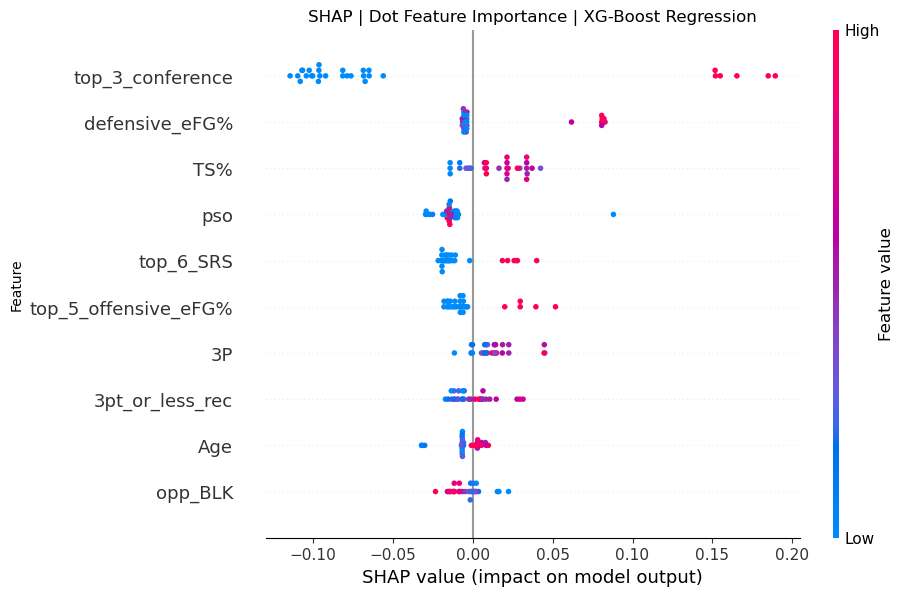

In [36]:

explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Dot Feature Importance | XG-Boost Regression')


plt.ylabel("Feature")
plt.show()

### Feature Finder

In [2]:


# Load data
df = pd.read_csv("NBA Champion RawData.csv")
df.fillna(0, inplace=True)
df.rename(columns={'season': 'Season'}, inplace=True)

# Drop data before 2005
df = df[df['Season'] >= 1990]

# Feature set
features = ['rk_conference', 'top_3_conference', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
                '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG',
                'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%',
                'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec',
                'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_or_less_rec',
                '10pt_or_more_rec', 'pre_all_star_rec', 'post_all_star_rec', 'e_conf_rec', 'w_conf_rec', 'sum_mvp_shares', 'sum_dpoy_shares', 
                'sum_roy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_cpoy_shares', 'sum_all_nba', 'sum_all_defense', 'sum_all_rookie',
                'sum_mvps_won', 'sum_dpoys_won', 'sum_roys_won', 'sum_mips_won', 'sum_cpoys_won', 'sum_all_nba_1st', 'sum_all_def_1st', 'sum_playoff_games',
                'sum_mvp_shares_L3S', 'sum_mvp_shares_L5S', 'sum_champion_shares', 'sum_champions', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs',
                'sum_player_L8S_cs', 'sum_all_nba_1st_L5S', 'team_rating_custom', 'max_player_rating_custom','sum_coach_playoff_games', 'sum_coy_shares',
                'conference_5pt_or_less_rec', 'conference_OR', 'conference_SRS', 'conference_age', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 
                'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%',
                'defensive_DRB%', 'defensive_FT/FGA','overall_record', 'rk_season','sum_franchise_L1S_cs', 'sum_franchise_L3S_cs', 'sum_franchise_L5S_cs', 'sum_franchise_L8S_cs',
                 'rank_offensive_eFG%', 'rank_2P%', 'rank_sum_all_nba_1st_L5S', 'rank_SRS', 'top_5_offensive_eFG%', 'top_3_2P%', 'top_5_sum_all_nba_1st_L5S', 'top_6_SRS']

# Function to calculate NDCG score
def ndcg_at_k(r, k=14):
    r = np.asfarray(r)[:k]
    if r.size:
        dcg = np.sum(r / np.log2(np.arange(2, r.size + 2)))
        idcg = np.sum(np.sort(r)[::-1] / np.log2(np.arange(2, r.size + 2)))
        return dcg / idcg if idcg > 0 else 0
    return 0

# Function to evaluate NDCG for a feature subset
def evaluate_ndcg(feature_subset):
    test_seasons = [2024, 2023, 2022, 2021, 2020]
    ndcg_scores = []

    for test_season in test_seasons:
        train = df[df["Season"] < test_season].copy()
        test = df[df["Season"] == test_season].copy()

        # Normalize data
        scaler = MinMaxScaler()
        scaler.fit(train[feature_subset])
        train[feature_subset] = scaler.transform(train[feature_subset])
        test[feature_subset] = scaler.transform(test[feature_subset])

        # Train Ridge Regression model
        model = RandomForestRegressor(
                n_estimators=100,         
                max_depth=3,            
                min_samples_split=5,     
                min_samples_leaf=2,      
                random_state=5
            )
        
        model.fit(train[feature_subset], train["champion_share"])

        # Predict and sort results
        predictions = model.predict(test[feature_subset])
        test["predicted_cs"] = predictions
        test = test.sort_values(["Season", "predicted_cs"], ascending=[False, False])

        # Compute NDCG score
        ndcg_score = ndcg_at_k(test['champion_share'].values, k=14)
        ndcg_scores.append(ndcg_score)

    return np.mean(ndcg_scores)

# Feature search loop with progress bar
num_iterations = 1000 #100k takes 2 hours 
best_feature_set = None
best_ndcg_score = 0

print("\n🔄 Running Feature Search...")

for _ in tqdm(range(num_iterations), desc="Evaluating Features", unit="set"):
    feature_subset = random.sample(features, random.randint(20, 30))
    avg_ndcg_score = evaluate_ndcg(feature_subset)

    if avg_ndcg_score > best_ndcg_score:
        best_ndcg_score = avg_ndcg_score
        best_feature_set = feature_subset

# Print best feature subset and its NDCG score
print("\n✅ Best Feature Subset (Size:", len(best_feature_set), "):", best_feature_set)
print("🏆 Best Average NDCG Score:", best_ndcg_score)




🔄 Running Feature Search...


Evaluating Features:   4%|▎         | 36/1000 [00:22<10:06,  1.59set/s]


KeyboardInterrupt: 